In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
xtrain = torch.load('./drive/MyDrive/Adv AI A4/xtrainfe7v2.pt',map_location=torch.device('cpu'))
ytrain = torch.load('./drive/MyDrive/Adv AI A4/ytrainfe7v2.pt',map_location=torch.device('cpu'))
xtest = torch.load('./drive/MyDrive/Adv AI A4/xtestfe7v2.pt',map_location=torch.device('cpu'))
ytest = torch.load('./drive/MyDrive/Adv AI A4/ytestfe7v2.pt',map_location=torch.device('cpu'))

In [4]:
xtrain = torch.stack(xtrain)
xtrain.size()

torch.Size([12500, 4, 4096])

In [5]:
ytrain = torch.stack(ytrain)
ytrain.size()

torch.Size([12500, 4])

In [6]:
xtest = torch.stack(xtest)
xtest.size()

torch.Size([10000, 1, 4096])

In [7]:
# ytest = torch.stack(ytest)
ytest.size()

torch.Size([10000, 1])

In [8]:
xtrain = xtrain.cpu()
xtrain = xtrain.numpy()
xtrain = xtrain.T.reshape(4096,50000)

In [9]:
xtrain.shape

(4096, 50000)

In [10]:
ytrain = ytrain.cpu()
ytrain = ytrain.numpy()
ytrain = ytrain.T.reshape(1,50000)

In [11]:
ytrain.shape

(1, 50000)

In [12]:
xtest = xtest.cpu()
xtest = xtest.numpy()
xtest = xtest.T.reshape(4096,10000)

In [13]:
xtest.shape

(4096, 10000)

In [14]:
ytest = ytest.cpu()
ytest = ytest.numpy()
ytest = ytest.T.reshape(1,10000)

In [15]:
ytest.shape

(1, 10000)

In [16]:
ytrain = ytrain.flatten()

In [17]:
xtrain = xtrain.T

In [18]:
xtrain.shape

(50000, 4096)

In [19]:
ytrain.shape

(50000,)

In [20]:
xtest = xtest.T

In [21]:
ytest = ytest.flatten()

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
model.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [39]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
logreg=LogisticRegression()
cross_val_predicted = cross_val_predict(model, xtrain, ytrain, cv=4)
print(metrics.accuracy_score(ytrain, cross_val_predicted))
print(metrics.classification_report(ytrain, cross_val_predicted))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8053
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      5000
           1       0.88      0.89      0.88      5000
           2       0.76      0.74      0.75      5000
           3       0.68      0.69      0.69      5000
           4       0.77      0.78      0.78      5000
           5       0.77      0.74      0.75      5000
           6       0.83      0.85      0.84      5000
           7       0.81      0.81      0.81      5000
           8       0.86      0.88      0.87      5000
           9       0.87      0.87      0.87      5000

    accuracy                           0.81     50000
   macro avg       0.80      0.81      0.80     50000
weighted avg       0.80      0.81      0.80     50000



In [24]:
print("Accuracy on Test set using Logistic Regression: ",model.score(xtest,ytest))

Accuracy on validation set using Logistic Regression:  0.8051


In [25]:
ypred = model.predict(xtest)

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

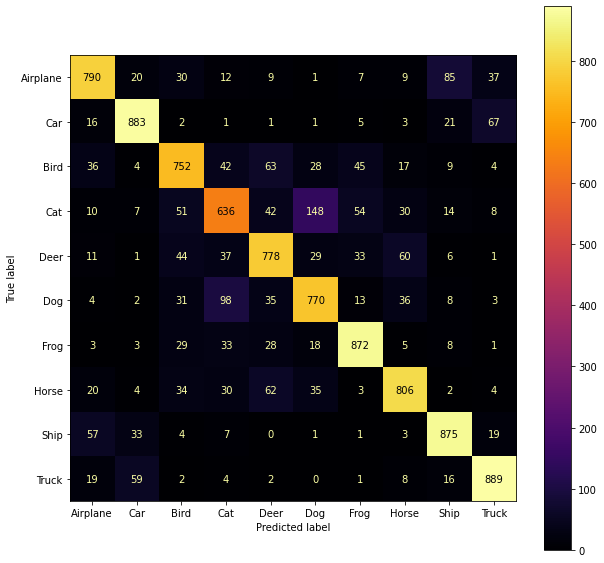

In [29]:
cm = confusion_matrix(ytest, ypred)
classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xticklabels(classes)
disp = disp.plot(ax=ax,cmap='inferno')
plt.show()